# Análise dos dados - Enem 2021

<p>Este projeto foi feito por <b>Débora Ratto</b> e faz uma análise sobre os microdados do Enem de 2021.</p>

# Sobre este estudo

<p>Neste projeto eu utilizei dados abertos disponibilizados pelo Ministério da Educação sobre o Enem de 2021. Você encontra esses e os dados de anos anteriores <a href='https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem'>clicando aqui</a>.

Esses dados contem informações sobre os candidatos que fizeram a inscrição para realizar as provas do enem 2021. Mas fiquem tranquilos que esses dados não trazem nenhuma informação confidencial sobre esses candidatos, apenas as respostas dadas por eles sobre a situação socioeconomica, as notas e locais das provas e informações sobre a escola onde o candidato estudou.</p>

# Perguntas a serem respondidas

* Houve mais homens ou mulheres que realizaram o enem em 2021?
* Qual o Estado com maior número de candidatos inscritos? E qual o Estado com menor número de candidatos?
* Ter ou não internet em casa influência na nota final do aluno no Enem?
* O tipo de escola, pública ou particular, influencia na nota final do candidato?
* O nível de escolaridade do pai ou da mãe influência na nota final do candidato?

## Importando blibiotecas

In [131]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as mpl
import plotly.express as pt
import numpy as np

## Importando o arquivo csv com os dados

In [137]:
dados_enem_2021= pd.read_csv("MicrodadosEnem2021/DADOS/MICRODADOS_ENEM_2021.csv",sep=';',encoding= 'ISO-8859-1',header=0)

## Limpeza e entendimento inicial dos dados

In [138]:
dados_enem_2021.tail()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3389827,210053249138,2021,7,F,1,3,1,1,0,1,...,A,A,A,B,A,A,B,A,A,B
3389828,210053776013,2021,7,F,1,1,1,1,5,1,...,B,A,B,C,A,A,E,B,B,B
3389829,210052441508,2021,13,F,1,3,1,1,15,1,...,B,A,A,A,A,A,B,A,B,B
3389830,210051139675,2021,7,F,1,1,1,1,4,1,...,B,A,B,B,A,B,E,A,C,B
3389831,210052410399,2021,12,F,2,3,1,1,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
dados_enem_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [47]:
dados_enem_2021.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [5]:
ColunasSelecionadas = ['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO','NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

In [133]:
dados_enem_2021_colsSel= dados_enem_2021.filter(items= ColunasSelecionadas)

In [50]:
dados_enem_2021_colsSel.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


## Iniciando as análises e visualizações

<p>Agora que já filtramos apenas as informações necessárias e que iremos utilizar podemos começar a fazer algumas análises e visualizações para responder algumas perguntas.

Vamos iniciar com a seguinte pergunta:</p>

<i>Houve mais homens ou mulheres que realizaram o enem em 2021?</i>

In [143]:
cols_sexo= dados_enem_2021_colsSel['TP_SEXO']

In [144]:
Total_Sexo = cols_sexo.value_counts()

In [145]:
Total_Sexo

F    2090526
M    1299306
Name: TP_SEXO, dtype: int64

In [146]:
porcSexo = [100*x/Total_Sexo.sum() for x in Total_Sexo]

In [147]:
porcSexo

[61.67048986498446, 38.32951013501554]

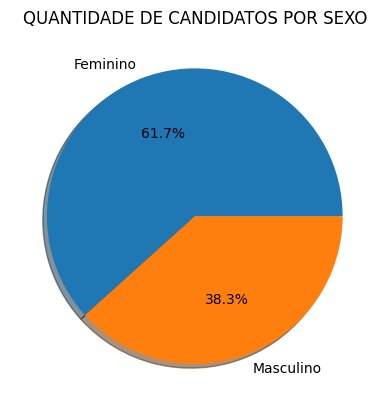

In [233]:
Sexo=['Feminino','Masculino']
mpl.pie(porcSexo, labels= Sexo, shadow=True, autopct='%1.1f%%')
mpl.title('QUANTIDADE DE CANDIDATOS POR SEXO')
mpl.show()

<p>Podemos observar que houve 61.7% de candidatos do sexo feminino e 38.3% de candidatos do sexo masculino, sendo uma maior parte de mulheres a realizarem o enem em 2021.</p>

<p>O que faz sentido ao analisarmos o ingresso de pessoas no ensino superior segundo um estudo feito pela <a href='https://abres.org.br/estatisticas/'>ABRES</a>, onde mostra que do total de matrículas feitas para o ensino superior a maioria é do sexo feminino, assim como a maioria dos concluintes do ensino superior também são de pessoas do sexo feminino.</p>


### Análise de candidatos por Estado

<p>Agora vamos responder a seguinte pergunta:</p>
<i> Qual o Estado com maior número de candidatos inscritos? E qual o Estado com menor número de candidatos?</i>

* A maior parte de candidatos do Enem 2021 se concentra no Estado de São Paulo. Algo esperado já que o Estado de São Paulo é o mais populoso do país segundo o IBGE.
* Já o Estado que houve menos candidatos inscritos foi Roraima, algo também esperado se formos analisar o número de habitantes desse estado em comparação aos de mais estados brasileiros segundo o IBGE.

<p>Uma outra análise interessante que podemos fazer com essa visualização é:</p>

* Podemos perceber que além de o primeiro e ultimo estados com mais e menos candidatos inscritos, respectivamente, serem obvios por questão de população e ter sido algo que se relacionou, isso não acontece com todos os outros Estados. Se observarmos, o Estado da Bahia é o quarto estado com mais habitantes do Brasil segundo o IBGE e RJ o terceiro, mas a posição deles se inverte no número de candidatos inscritos no enem 2021. E isso ocorre com alguns outros Estados também, que apesar de ter uma população maior teve menos candidatos inscritos que outros Estados com população menor.

<a href='https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/31458-populacao-estimada-do-pais-chega-a-213-3-milhoes-de-habitantes-em-2021#:~:text=Entre%20as%20unidades%20da%20federa%C3%A7%C3%A3o,17%2C5%20milh%C3%B5es%20de%20habitantes.'>Dados do IBGE</a>

In [148]:
cols_uf_prova= dados_enem_2021_colsSel['SG_UF_PROVA']

In [149]:
TotalEstados = cols_uf_prova.value_counts()

Text(0, 0.5, 'Quantidade de Candidatos')

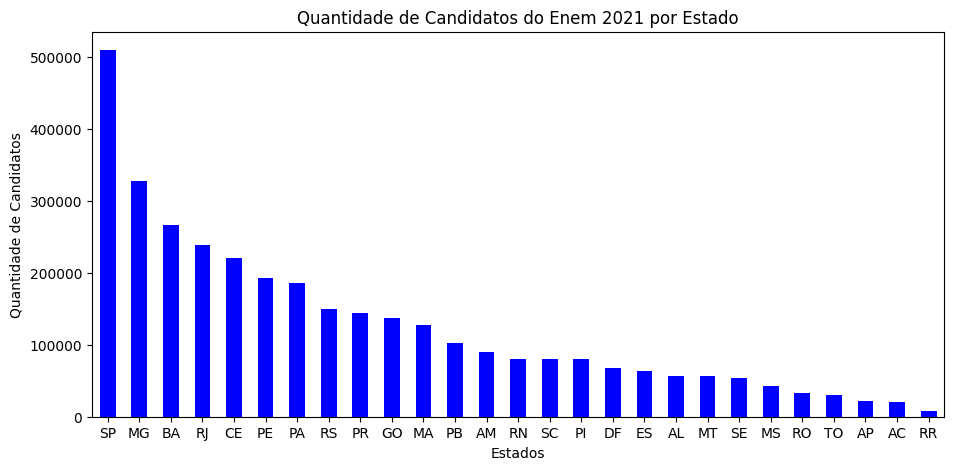

In [150]:
TotalEstados.plot(kind='bar', figsize=(11,5), grid=False, rot=0, color='blue')

mpl.title('Quantidade de Candidatos do Enem 2021 por Estado')
mpl.xlabel('Estados')
mpl.ylabel('Quantidade de Candidatos')

### Análise sobre ter ou não internet em casa

<p>Agora iremos responder a seguinte pergunta:</p>
<i>Ter ou não internet em casa influência na nota final do aluno no Enem?</i>

In [234]:
cols_ac_int= dados_enem_2021_colsSel['Q025']

In [235]:
Acesso_int= cols_ac_int.value_counts()

In [236]:
porcAcInt = [100*x/Acesso_int.sum() for x in Acesso_int]

In [237]:
print(Acesso_int)
print(porcAcInt)

B    3037632
A     352198
Name: Q025, dtype: int64
[89.61015744152361, 10.389842558476383]


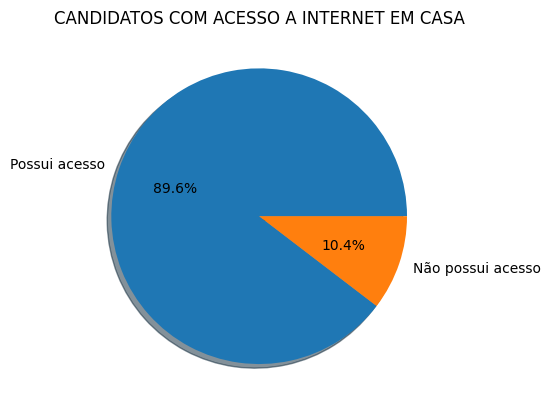

In [257]:
Acesso= ['Possui acesso','Não possui acesso']
mpl.pie(porcAcInt, labels= Acesso, shadow=True, autopct='%1.1f%%')
mpl.title('CANDIDATOS COM ACESSO A INTERNET EM CASA')
mpl.show()

<p>Há 352198 pessoas que se inscreveram no enem de 2021 e não possuem acesso a internet, o que dá 10,4% do total de candidatos, como podemos observar no gráfico acima.</p>

In [242]:
colunasAcInt = ['Q025','NU_NOTA_MT','NU_NOTA_REDACAO']

In [248]:
AcIntDicionario = {'A':'Não','B':'Sim'}

In [243]:
dados_AcInt = dados_enem_2021.filter(items= colunasAcInt)

In [250]:
dados_AcInt.head()

,Q025,NU_NOTA_MT,NU_NOTA_REDACAO,AC_INT
1,A,461.5,560.0,Não
3,B,659.5,780.0,Sim
4,B,582.6,780.0,Sim
8,B,493.4,520.0,Sim
9,B,413.3,380.0,Sim


In [246]:
dados_AcInt= dados_AcInt.dropna()

In [249]:
dados_AcInt['AC_INT'] = [AcIntDicionario[resp] for resp in dados_AcInt.Q025]

In [252]:
cols= ['NU_NOTA_MT', 'AC_INT']
dados_AcInt.loc[:,cols].groupby('AC_INT').describe()

NU_NOTA_MT                                                         
            count        mean         std  min    25%    50%    75%    max
AC_INT                                                                    
Não      189367.0  471.828225   77.537754  0.0  414.7  454.6  513.2  929.5
Sim     2048739.0  541.054352  111.339381  0.0  449.5  523.5  621.6  953.1

In [262]:
cols= ['NU_NOTA_MT', 'AC_INT']
dados_AcInt.loc[:,cols].groupby('AC_INT').median()

,NU_NOTA_MT
AC_INT,
Não,454.6
Sim,523.5


AC_INT
Não    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Sim    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
dtype: object

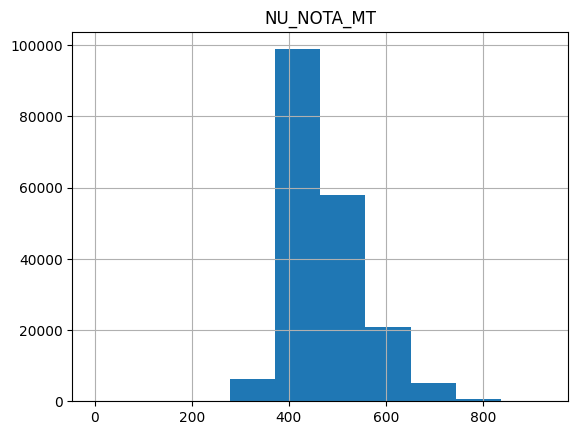

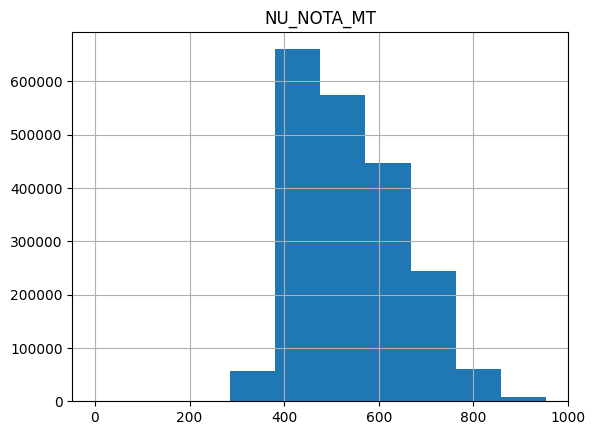

In [258]:
cols= ['NU_NOTA_MT', 'AC_INT']
dados_AcInt.loc[:,cols].groupby('AC_INT').hist()

<p>Se formos observar a média e mediana obtidas na prova de matemática pelos dois grupos em comparação, vemos que quem tem acesso a internet teve um desempenho melhor que os candidatos que não possuem acesso. Mas observando os histogramas, notamos que em sua grande maioria, os candidatos obtiveram notas parecidas. A maior parte dos candidatos obtiveram pontuação entre 400 e 500 pontos nos dois grupos. </p>

In [259]:
cols= ['NU_NOTA_REDACAO', 'AC_INT']
dados_AcInt.loc[:,cols].groupby('AC_INT').describe()

NU_NOTA_REDACAO                                                    \
                 count        mean         std  min    25%    50%    75%   
AC_INT                                                                     
Não           189367.0  538.094916  184.854784  0.0  460.0  560.0  640.0   
Sim          2048739.0  630.352163  181.917959  0.0  540.0  620.0  760.0   

                
           max  
AC_INT          
Não      980.0  
Sim     1000.0

In [261]:
cols= ['NU_NOTA_REDACAO', 'AC_INT']
dados_AcInt.loc[:,cols].groupby('AC_INT').median()

,NU_NOTA_REDACAO
AC_INT,
Não,560.0
Sim,620.0


AC_INT
Não    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Sim    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
dtype: object

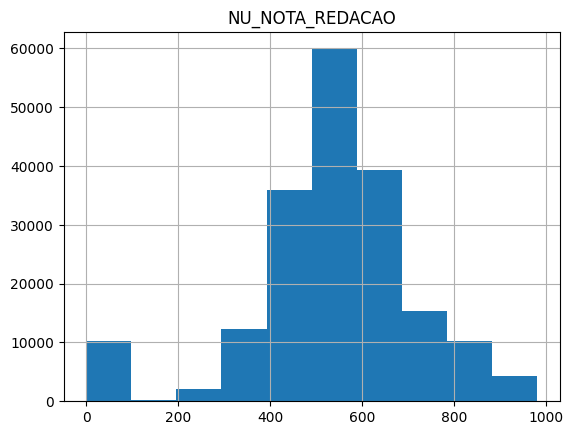

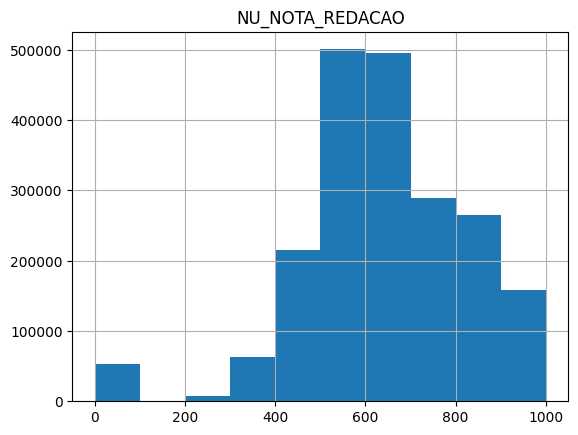

In [260]:
cols= ['NU_NOTA_REDACAO', 'AC_INT']
dados_AcInt.loc[:,cols].groupby('AC_INT').hist()

<p>A mesma observação que ocorreu para as notas de matemática ocorre com as notas de redação.</p>
<p>Podemos observar que a média e mediana há uma diferença, mas as pontuações observadas no histograma são bem parecidas para a maioria dos candidatos presente nos dois grupos. As pontuações de redação para ambos variou entre 500 e 700 pontos para um número maior de candidatos.</p>

### Análise sobre tipo de escola (Pública ou Particular)

<p>A pergunta que iremos responder aqui é:</p>
<i>O tipo de escola, pública ou particular, influencia na nota final do candidato?</i>




In [155]:
colunasTPEscola = ['TP_ESCOLA','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT']

In [156]:
dados_TPEscola = dados_enem_2021.filter(items= colunasTPEscola)

In [161]:
dados_TPEscola.head()

,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TIPO_ESCOLA
1,1,505.9,551.8,498.3,461.5,Não Respondeu
3,2,580.7,678.9,638.9,659.5,Pública
4,2,497.7,532.4,457.6,582.6,Pública
8,2,487.4,476.5,450.7,493.4,Pública
9,2,507.6,539.2,494.6,413.3,Pública


In [158]:
dados_TPEscola = dados_TPEscola.dropna()

In [159]:
TPEscolaDicionario = {1:'Não Respondeu',2:'Pública',3:'Privada'}

In [160]:
dados_TPEscola['TIPO_ESCOLA'] = [TPEscolaDicionario[resp] for resp in dados_TPEscola.TP_ESCOLA]

In [162]:
cols= ['NU_NOTA_CN', 'TIPO_ESCOLA']
dados_TPEscola.loc[:,cols].groupby('TIPO_ESCOLA').describe()

NU_NOTA_CN                                                   \
                   count        mean        std  min    25%    50%    75%   
TIPO_ESCOLA                                                                 
Não Respondeu  1390710.0  496.608727  81.687964  0.0  435.2  487.0  551.2   
Privada         179361.0  538.988388  83.084548  0.0  477.2  542.5  598.9   
Pública         668036.0  469.457904  69.428985  0.0  417.3  461.4  514.6   

                      
                 max  
TIPO_ESCOLA           
Não Respondeu  867.1  
Privada        844.5  
Pública        848.7

In [163]:
cols= ['NU_NOTA_CH', 'TIPO_ESCOLA']
dados_TPEscola.loc[:,cols].groupby('TIPO_ESCOLA').describe()

NU_NOTA_CH                                                   \
                   count        mean        std  min    25%    50%    75%   
TIPO_ESCOLA                                                                 
Não Respondeu  1390710.0  529.345818  95.985723  0.0  453.9  533.4  599.3   
Privada         179361.0  567.547878  90.159713  0.0  510.5  577.3  630.3   
Pública         668036.0  498.438536  85.232107  0.0  432.2  496.0  561.3   

                      
                 max  
TIPO_ESCOLA           
Não Respondeu  846.9  
Privada        846.9  
Pública        846.9

In [164]:
cols= ['NU_NOTA_LC', 'TIPO_ESCOLA']
dados_TPEscola.loc[:,cols].groupby('TIPO_ESCOLA').describe()

NU_NOTA_LC                                                   \
                   count        mean        std  min    25%    50%    75%   
TIPO_ESCOLA                                                                 
Não Respondeu  1390710.0  508.975711  78.983267  0.0  453.7  513.0  565.7   
Privada         179361.0  546.156276  70.409800  0.0  502.2  551.8  595.4   
Pública         668036.0  485.255554  72.376732  0.0  434.1  487.8  536.8   

                      
                 max  
TIPO_ESCOLA           
Não Respondeu  826.1  
Privada        799.3  
Pública        820.5

In [165]:
cols= ['NU_NOTA_MT', 'TIPO_ESCOLA']
dados_TPEscola.loc[:,cols].groupby('TIPO_ESCOLA').describe()

NU_NOTA_MT                                                    \
                   count        mean         std  min    25%    50%    75%   
TIPO_ESCOLA                                                                  
Não Respondeu  1390710.0  538.551688  112.201234  0.0  446.7  519.6  619.1   
Privada         179361.0  608.088056  114.451848  0.0  519.5  615.6  691.5   
Pública         668036.0  508.643054   95.317350  0.0  433.1  488.9  571.5   

                      
                 max  
TIPO_ESCOLA           
Não Respondeu  953.1  
Privada        953.1  
Pública        953.1

* Podemos notar que a média das notas para os alunos de escola pública são menores que para os alunos de escola particular.
* Podemos notar também, que a nota máxima varia para cada matéria, em Ciências da Natureza e Linguagens, os alunos de escola púbica tiveram uma nota máxima maior, já em Ciências Humanas e Matemática a nota máxima foi igual para ambos.

TIPO_ESCOLA
Não Respondeu    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Privada          [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Pública          [[AxesSubplot(0.125,0.11;0.775x0.77)]]
dtype: object

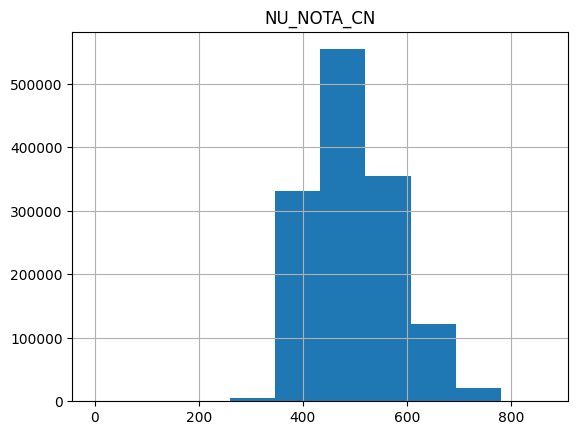

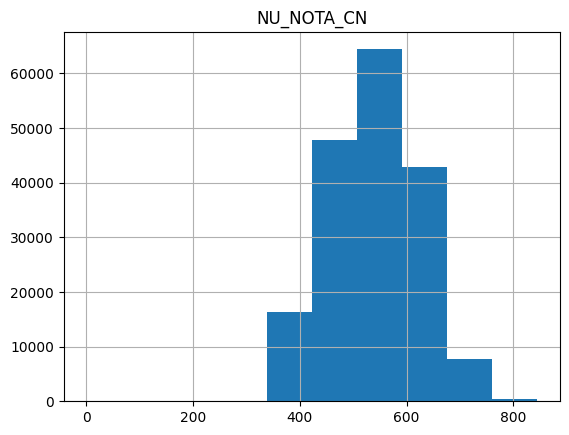

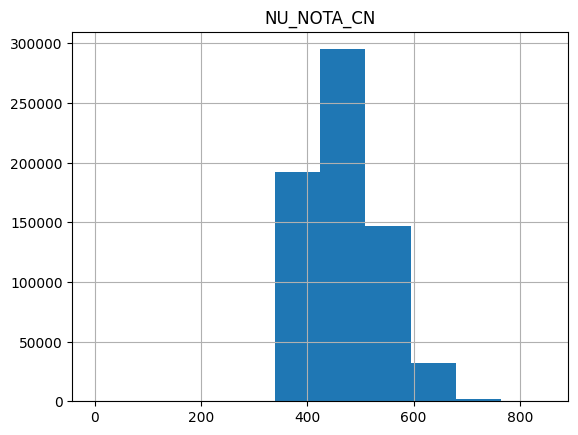

In [166]:
cols= ['NU_NOTA_CN', 'TIPO_ESCOLA']
dados_TPEscola.loc[:,cols].groupby('TIPO_ESCOLA').hist()

TIPO_ESCOLA
Não Respondeu    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Privada          [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Pública          [[AxesSubplot(0.125,0.11;0.775x0.77)]]
dtype: object

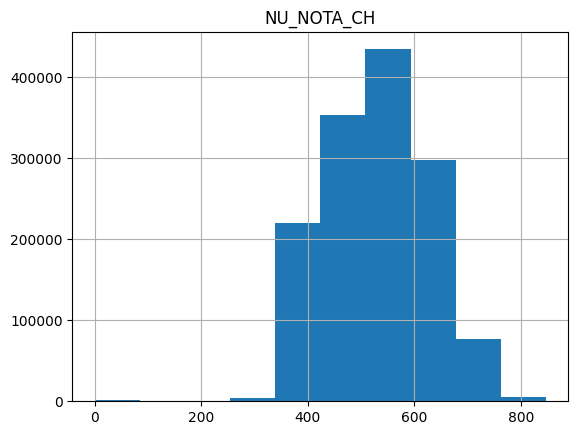

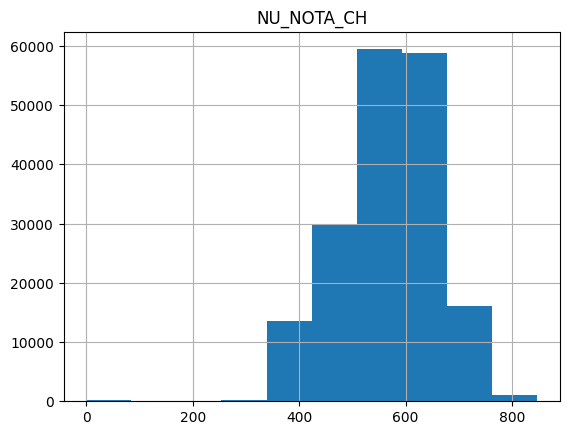

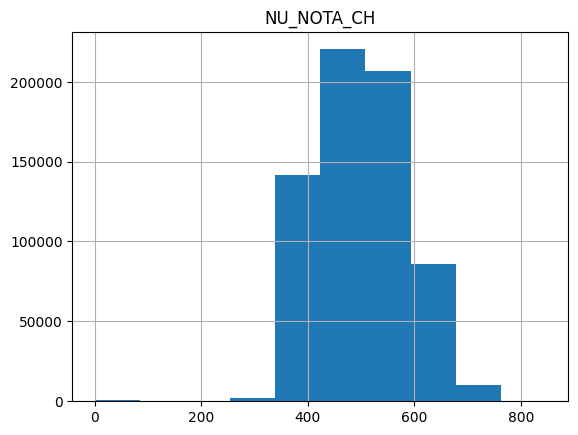

In [167]:
cols= ['NU_NOTA_CH', 'TIPO_ESCOLA']
dados_TPEscola.loc[:,cols].groupby('TIPO_ESCOLA').hist()

TIPO_ESCOLA
Não Respondeu    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Privada          [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Pública          [[AxesSubplot(0.125,0.11;0.775x0.77)]]
dtype: object

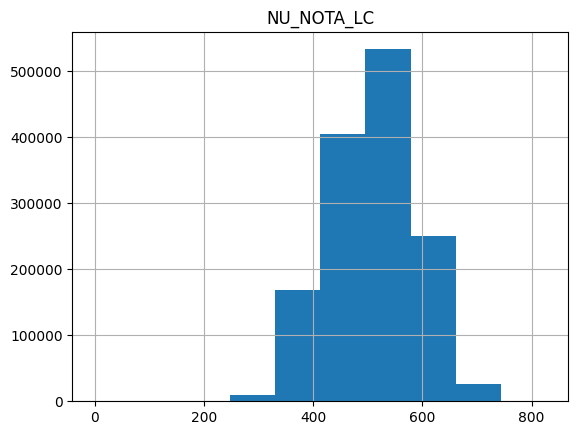

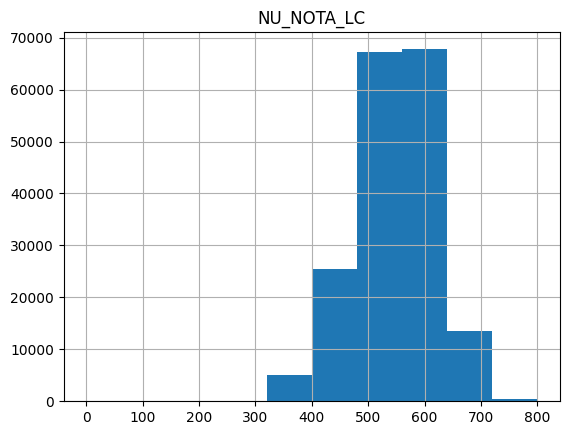

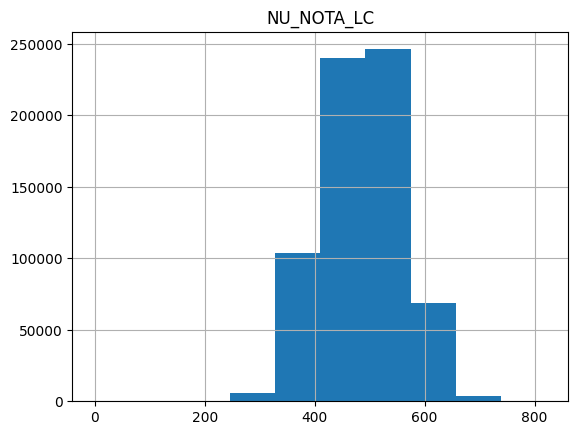

In [168]:
cols= ['NU_NOTA_LC', 'TIPO_ESCOLA']
dados_TPEscola.loc[:,cols].groupby('TIPO_ESCOLA').hist()

TIPO_ESCOLA
Não Respondeu    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Privada          [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Pública          [[AxesSubplot(0.125,0.11;0.775x0.77)]]
dtype: object

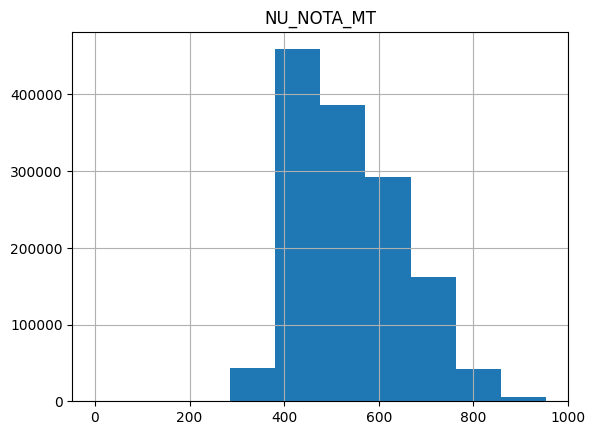

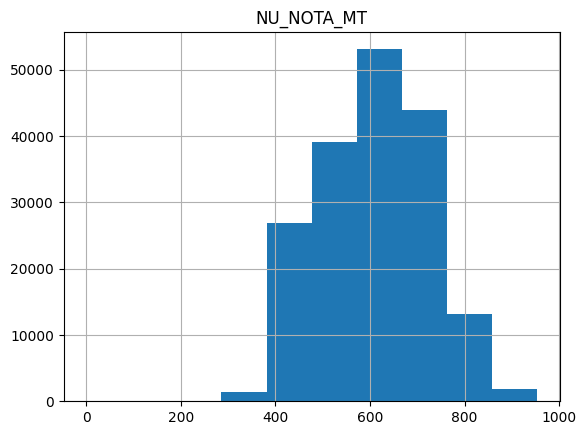

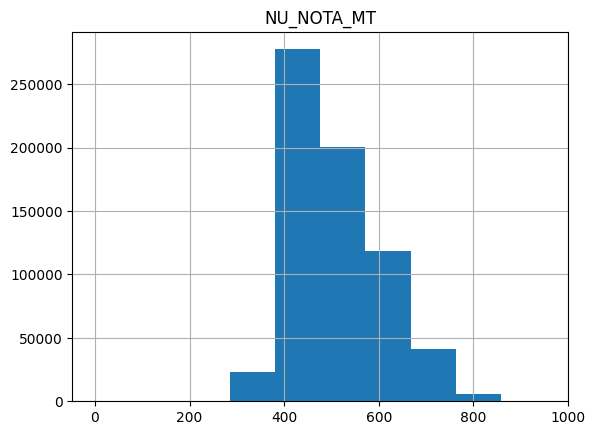

In [169]:
cols= ['NU_NOTA_MT', 'TIPO_ESCOLA']
dados_TPEscola.loc[:,cols].groupby('TIPO_ESCOLA').hist()

* Observando os histogramas, notamos que em Liguagens a maior concentração de candidatos que foram estudantes de escola pública  tirou notas entre 400 e 500 e para candidatos que foram estudantes de escola particular a maior concentração se encontra entre 500 e 600.  
* Para as notas de matemática, temos um maior numero de candidatos que estudou em escola pública com notas entre 400 e 500 novamente e para candidatos que estudaram em escola particular temos uma maior concentração nas notas de 500 a 700 pontos.

<p>Com base nos dados, podemos dizer que a resposta para pergunta é que o tipo de escola faz sim diferença entre a maioria dos alunos, havendo excessões como podemos ver com as pontuações máximas das provas.</p>

### Análises referente a escolaridade dos pais

<p>Agora vamos responder a questão: </p>
<i>O nível de escolaridade do pai ou da mãe influência na nota final do candidato?</i>



In [170]:
colunasEscolaridadePais = ['Q001', 'Q002','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT']

In [171]:
dados_EscolaridadePais = dados_enem_2021.filter(items= colunasEscolaridadePais)

In [177]:
dados_EscolaridadePais.head()

,Q001,Q002,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,ESC_PAI,ESC_MAE
1,B,B,505.9,551.8,498.3,461.5,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
3,B,B,580.7,678.9,638.9,659.5,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
4,D,E,497.7,532.4,457.6,582.6,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
8,B,B,487.4,476.5,450.7,493.4,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
9,D,D,507.6,539.2,494.6,413.3,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...


In [173]:
dados_EscolaridadePais = dados_EscolaridadePais.dropna()

In [174]:
EscolaridadePaisDicionario = {'A':'Nunca estudou',
'B':'Não completou a 4ª série/5º ano do Ensino Fundamental',
'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
'D':'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
'E':'Completou o Ensino Médio, mas não completou a Faculdade',
'F':'Completou a Faculdade, mas não completou a Pós-graduação',
'G':'Completou a Pós-graduação',
'H':'Não sei'}

In [175]:
dados_EscolaridadePais['ESC_PAI'] = [EscolaridadePaisDicionario[resp] for resp in dados_EscolaridadePais.Q001]

In [176]:
dados_EscolaridadePais['ESC_MAE'] = [EscolaridadePaisDicionario[resp] for resp in dados_EscolaridadePais.Q002]

In [178]:
cols= ['NU_NOTA_LC', 'ESC_PAI']
dados_EscolaridadePais.loc[:,cols].groupby('ESC_PAI').mean().sort_values('NU_NOTA_LC', ascending=False)

,NU_NOTA_LC
ESC_PAI,
Completou a Pós-graduação,551.944799
"Completou a Faculdade, mas não completou a Pós-graduação",544.912116
"Completou o Ensino Médio, mas não completou a Faculdade",512.331895
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",497.323147
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",489.318719
Não sei,486.926945
Não completou a 4ª série/5º ano do Ensino Fundamental,474.867172
Nunca estudou,455.723685


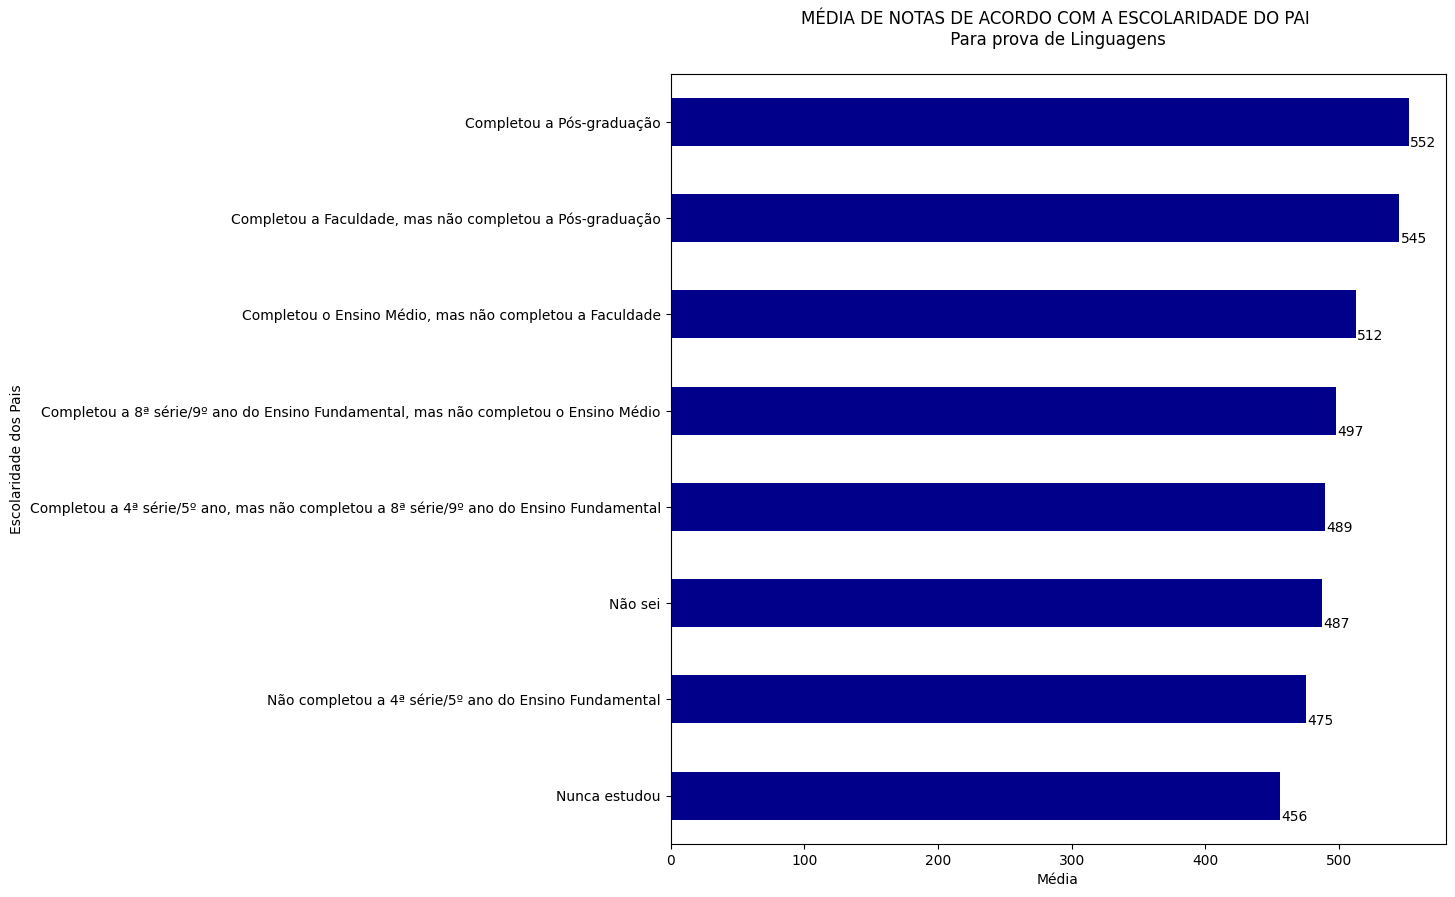

In [222]:
cols= ['NU_NOTA_LC', 'ESC_PAI']
np= dados_EscolaridadePais.loc[:,cols].groupby('ESC_PAI')['NU_NOTA_LC'].mean().sort_values().plot(kind='barh',grid=False, figsize=(10,10), rot=0, color='darkblue')

for p in np.patches:
    b=p.get_bbox()
    np.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.01))

mpl.title('MÉDIA DE NOTAS DE ACORDO COM A ESCOLARIDADE DO PAI \n Para prova de Linguagens \n')
mpl.xlabel('Média')
mpl.ylabel('Escolaridade dos Pais')
mpl.show()

In [179]:
cols= ['NU_NOTA_LC', 'ESC_MAE']
dados_EscolaridadePais.loc[:,cols].groupby('ESC_MAE').mean().sort_values('NU_NOTA_LC', ascending=False)

,NU_NOTA_LC
ESC_MAE,
Completou a Pós-graduação,540.180564
"Completou a Faculdade, mas não completou a Pós-graduação",535.110313
"Completou o Ensino Médio, mas não completou a Faculdade",505.873281
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",489.907826
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",482.673122
Não sei,470.752268
Não completou a 4ª série/5º ano do Ensino Fundamental,470.063631
Nunca estudou,450.859231


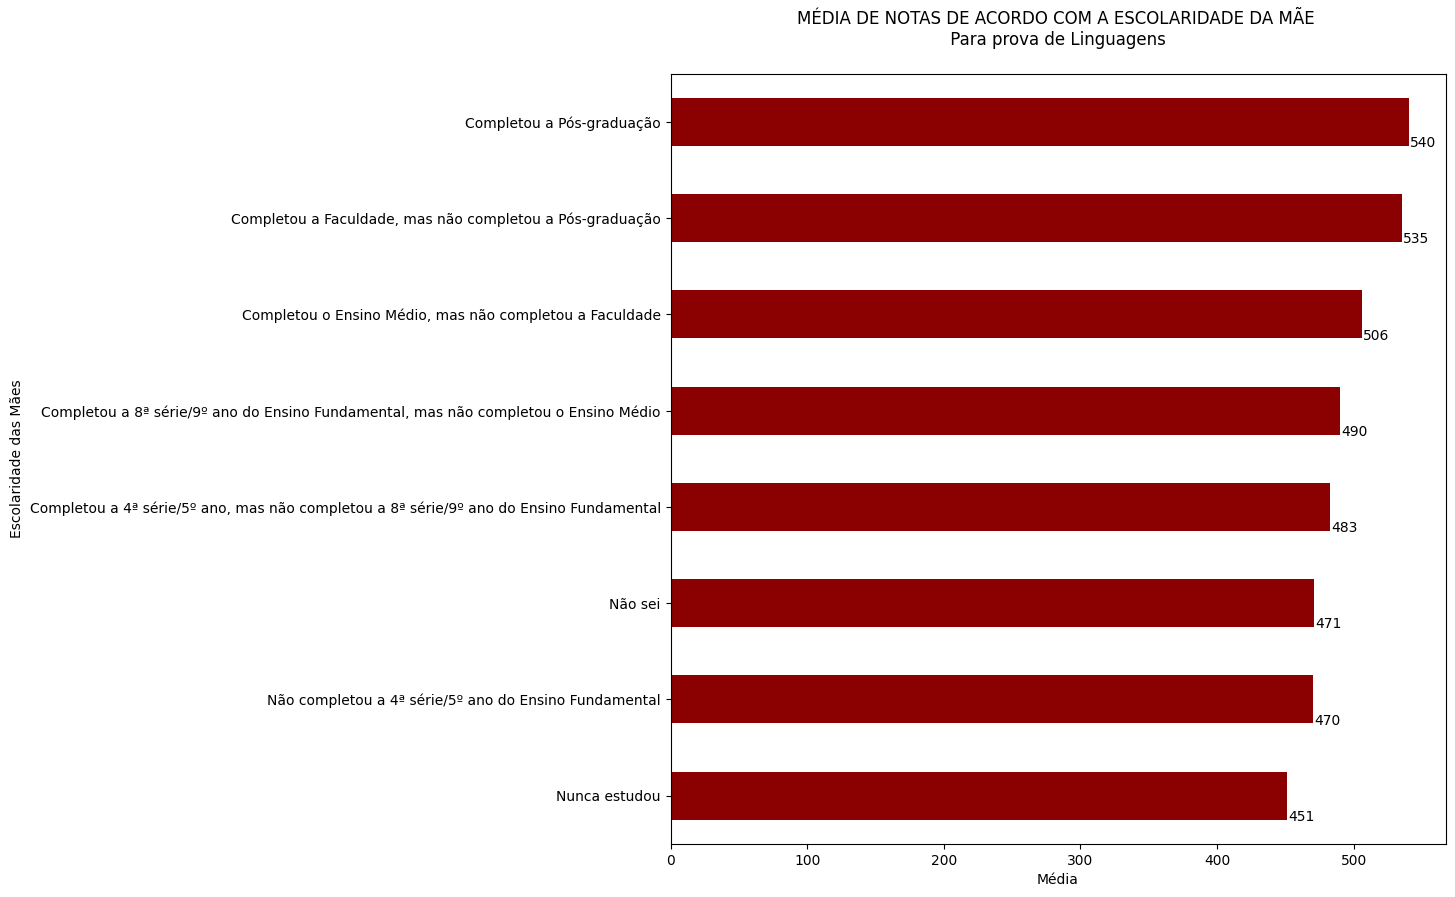

In [223]:
cols= ['NU_NOTA_LC', 'ESC_MAE']
np= dados_EscolaridadePais.loc[:,cols].groupby('ESC_MAE')['NU_NOTA_LC'].mean().sort_values().plot(kind='barh', figsize=(10,10), grid=False, rot=0, color='darkred')

for p in np.patches:
    b=p.get_bbox()
    np.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.01))

mpl.title('MÉDIA DE NOTAS DE ACORDO COM A ESCOLARIDADE DA MÃE \n Para prova de Linguagens \n')
mpl.xlabel('Média')
mpl.ylabel('Escolaridade das Mães')
mpl.show()

In [180]:
cols= ['NU_NOTA_MT', 'ESC_MAE']
dados_EscolaridadePais.loc[:,cols].groupby('ESC_MAE').mean().sort_values('NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
ESC_MAE,
Completou a Pós-graduação,592.406291
"Completou a Faculdade, mas não completou a Pós-graduação",582.600755
"Completou o Ensino Médio, mas não completou a Faculdade",533.379838
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",510.363869
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",501.083591
Não sei,493.232768
Não completou a 4ª série/5º ano do Ensino Fundamental,484.995819
Nunca estudou,464.279863


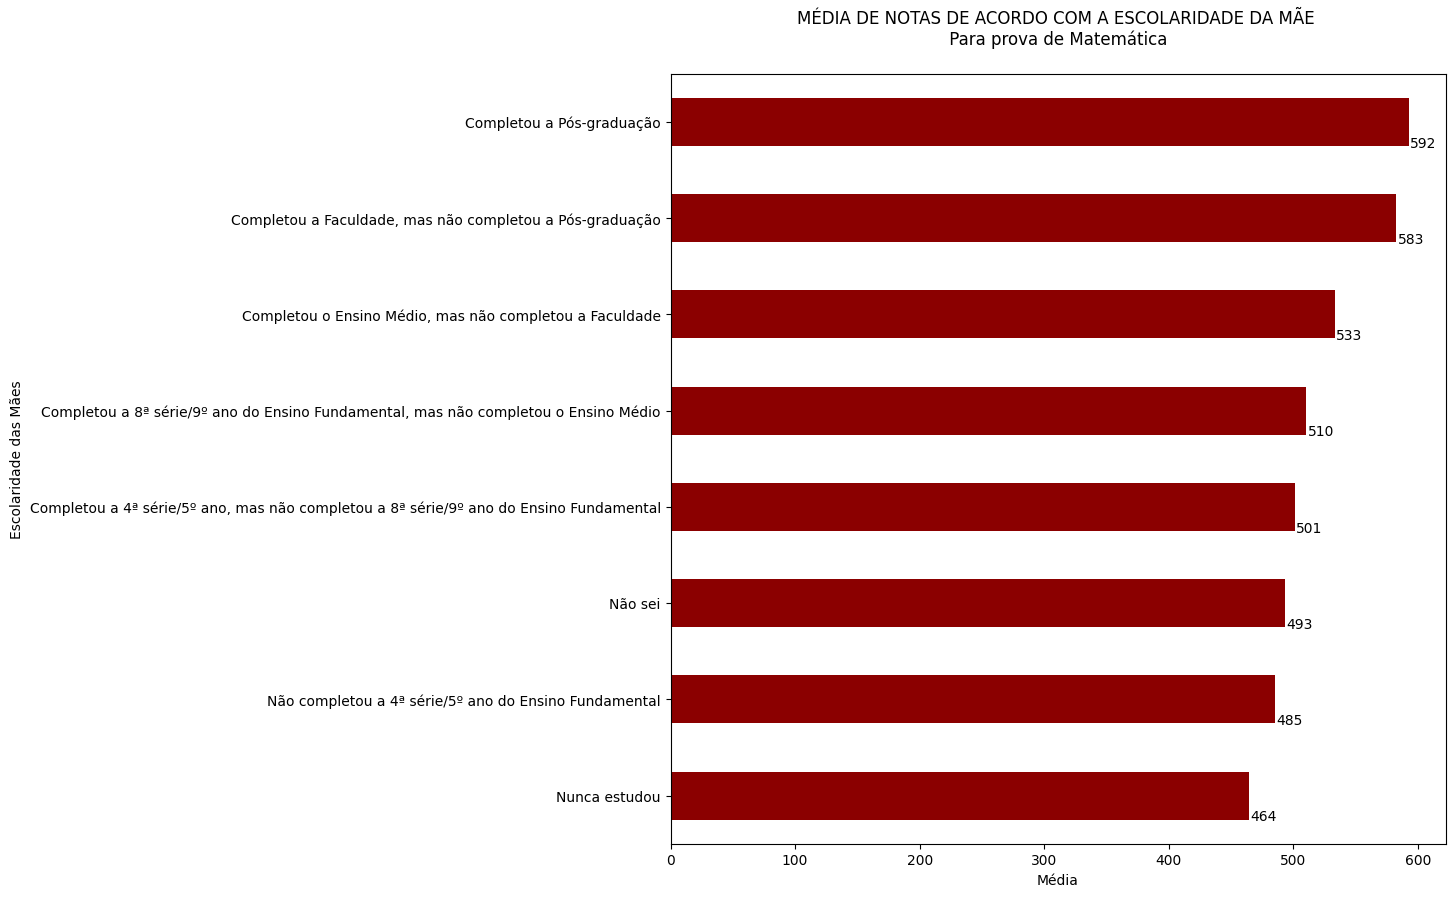

In [224]:
cols= ['NU_NOTA_MT', 'ESC_MAE']
np= dados_EscolaridadePais.loc[:,cols].groupby('ESC_MAE')['NU_NOTA_MT'].mean().sort_values().plot(kind='barh', figsize=(10,10), grid=False, rot=0, color='darkred')

for p in np.patches:
    b=p.get_bbox()
    np.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.01))

mpl.title('MÉDIA DE NOTAS DE ACORDO COM A ESCOLARIDADE DA MÃE \n Para prova de Matemática \n')
mpl.xlabel('Média')
mpl.ylabel('Escolaridade das Mães')
mpl.show()

In [181]:
cols= ['NU_NOTA_MT', 'ESC_PAI']
dados_EscolaridadePais.loc[:,cols].groupby('ESC_PAI').mean().sort_values('NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
ESC_PAI,
Completou a Pós-graduação,613.461090
"Completou a Faculdade, mas não completou a Pós-graduação",597.511863
"Completou o Ensino Médio, mas não completou a Faculdade",543.113614
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",521.973493
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",511.070163
Não sei,504.740075
Não completou a 4ª série/5º ano do Ensino Fundamental,492.429393
Nunca estudou,471.658243


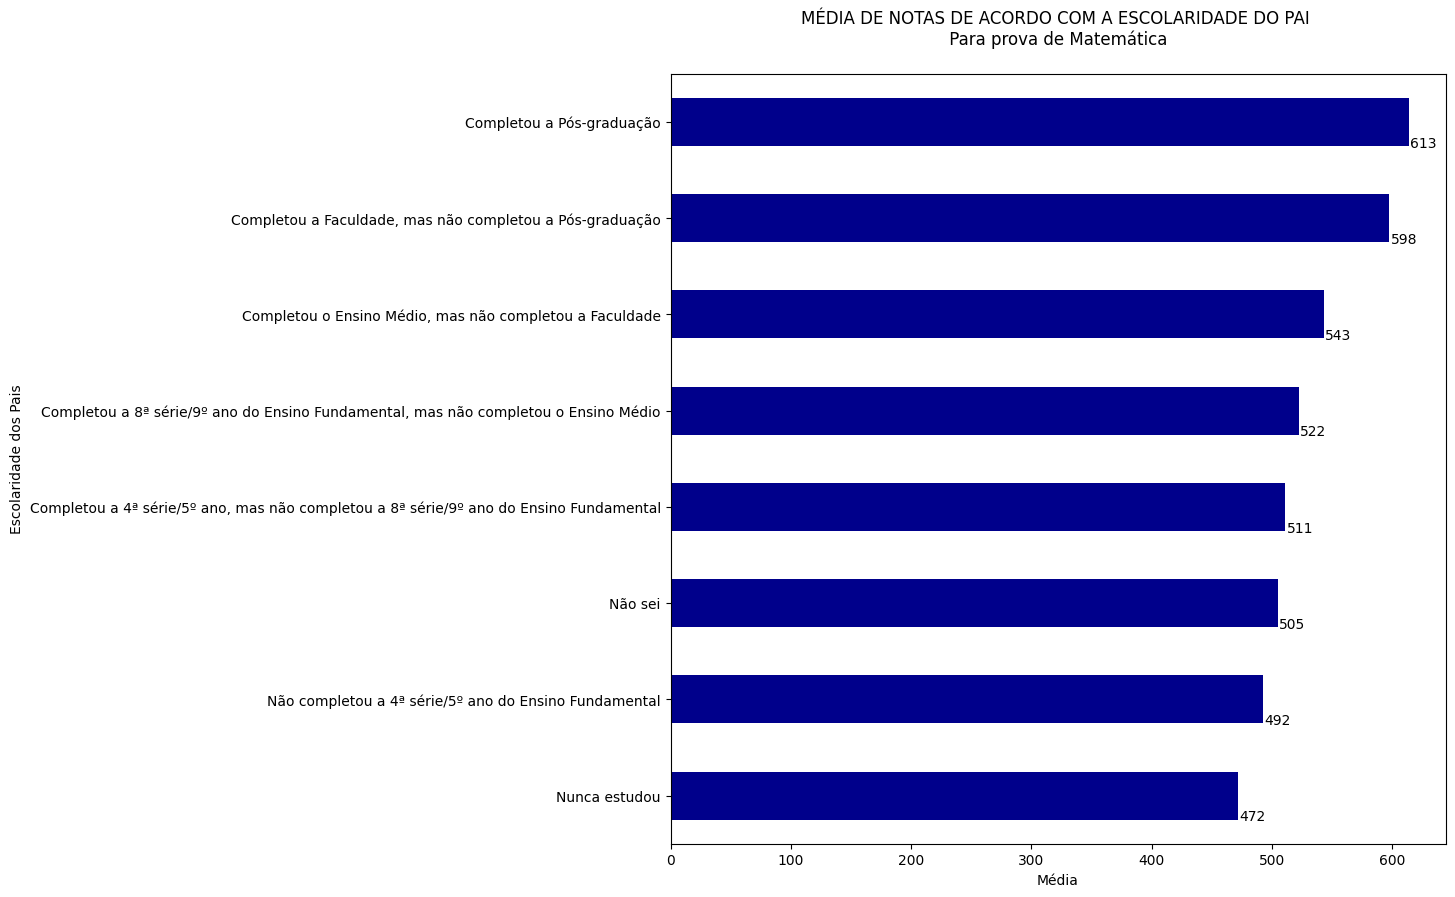

In [225]:
cols= ['NU_NOTA_MT', 'ESC_PAI']
np= dados_EscolaridadePais.loc[:,cols].groupby('ESC_PAI')['NU_NOTA_MT'].mean().sort_values().plot(kind='barh', figsize=(10,10), grid=False, rot=0, color='darkblue')

for p in np.patches:
    b=p.get_bbox()
    np.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.01))

mpl.title('MÉDIA DE NOTAS DE ACORDO COM A ESCOLARIDADE DO PAI \n Para prova de Matemática \n')
mpl.xlabel('Média')
mpl.ylabel('Escolaridade dos Pais')
mpl.show()

In [182]:
cols= ['NU_NOTA_MT', 'ESC_PAI']
dados_EscolaridadePais.loc[:,cols].groupby('ESC_PAI').describe()

NU_NOTA_MT              \
                                                        count        mean   
ESC_PAI                                                                     
Completou a 4ª série/5º ano, mas não completou ...   281447.0  511.070163   
Completou a 8ª série/9º ano do Ensino Fundament...   245630.0  521.973493   
Completou a Faculdade, mas não completou a Pós-...   246549.0  597.511863   
Completou a Pós-graduação                            183606.0  613.461090   
Completou o Ensino Médio, mas não completou a F...   681530.0  543.113614   
Nunca estudou                                         76399.0  471.658243   
Não completou a 4ª série/5º ano do Ensino Funda...   349980.0  492.429393   
Não sei                                              172965.0  504.740075   

                                                                            \
                                                           std  min    25%   
ESC_PAI                                                                      
Completou a 4ª série/5º ano, mas não completou ...   97.281056  0.0  434.3   
Completou a 8ª série/9º ano do Ensino Fundament...  100.632967  0.0  441.2   
Completou a Faculdade, mas não completou a Pós-...  117.307726  0.0  502.7   
Completou a Pós-graduação                           119.512693  0.0  519.5   
Completou o Ensino Médio, mas não completou a F...  107.484050  0.0  454.7   
Nunca estudou                                        80.443339  0.0  412.9   
Não completou a 4ª série/5º ano do Ensino Funda...   89.595417  0.0  424.0   
Não sei                                              95.641760  0.0  430.1   

                                                                         
                                                      50%    75%    max  
ESC_PAI                                                                  
Completou a 4ª série/5º ano, mas não completou ...  491.4  574.7  953.1  
Completou a 8ª série/9º ano do Ensino Fundament...  504.0  591.1  953.1  
Completou a Faculdade, mas não completou a Pós-...  601.8  684.0  953.1  
Completou a Pós-graduação                           622.3  700.7  953.1  
Completou o Ensino Médio, mas não completou a F...  529.4  621.5  953.1  
Nunca estudou                                       453.3  513.0  953.1  
Não completou a 4ª série/5º ano do Ensino Funda...  472.6  545.4  930.6  
Não sei                                             483.9  565.5  953.1

In [183]:
cols= ['NU_NOTA_MT', 'ESC_MAE']
dados_EscolaridadePais.loc[:,cols].groupby('ESC_MAE').describe()

NU_NOTA_MT              \
                                                        count        mean   
ESC_MAE                                                                     
Completou a 4ª série/5º ano, mas não completou ...   226251.0  501.083591   
Completou a 8ª série/9º ano do Ensino Fundament...   245533.0  510.363869   
Completou a Faculdade, mas não completou a Pós-...   321187.0  582.600755   
Completou a Pós-graduação                            309702.0  592.406291   
Completou o Ensino Médio, mas não completou a F...   795005.0  533.379838   
Nunca estudou                                         48071.0  464.279863   
Não completou a 4ª série/5º ano do Ensino Funda...   243449.0  484.995819   
Não sei                                               48908.0  493.232768   

                                                                            \
                                                           std  min    25%   
ESC_MAE                                                                      
Completou a 4ª série/5º ano, mas não completou ...   93.285421  0.0  428.7   
Completou a 8ª série/9º ano do Ensino Fundament...   96.508065  0.0  434.3   
Completou a Faculdade, mas não completou a Pós-...  117.282599  0.0  485.3   
Completou a Pós-graduação                           118.768435  0.0  494.5   
Completou o Ensino Médio, mas não completou a F...  104.741547  0.0  448.1   
Nunca estudou                                        76.369331  0.0  409.3   
Não completou a 4ª série/5º ano do Ensino Funda...   85.816724  0.0  420.1   
Não sei                                              94.289479  0.0  422.0   

                                                                           
                                                      50%      75%    max  
ESC_MAE                                                                    
Completou a 4ª série/5º ano, mas não completou ...  480.9  559.000  953.1  
Completou a 8ª série/9º ano do Ensino Fundament...  490.7  573.300  953.1  
Completou a Faculdade, mas não completou a Pós-...  581.2  670.200  953.1  
Completou a Pós-graduação                           594.9  680.900  953.1  
Completou o Ensino Médio, mas não completou a F...  517.1  608.000  953.1  
Nunca estudou                                       447.3  502.600  953.1  
Não completou a 4ª série/5º ano do Ensino Funda...  465.9  534.100  948.5  
Não sei                                             469.9  546.325  948.8

* Podemos notar que quanto maior a escolaridade dos pais, maior é a média das notas entre os candidatos.
* Mas se formos observar notas máximas e mínimas, temos que há excessões em todos os grupos. Mesmo alunos que os pais concluíram uma pós-graduação, onde a média é mais alta, há alunos que zeraram na nota da prova e alunos onde os pais nunca estudaram há aqueles que atingiram a nota máxima de pontos da prova.

# Conclusão

<p>Após realizar esse estudo vemos que há alguns fatores que influênciam muito no desempenho de uma pessoa e outros que nem tanto assim. Como o fato de não ter acesso a internet em casa parecer ser algo que atrasaria muito um candidato nos dias atuais, esse fato se mostrou ser algo irrelevante quando se trata dos conteúdos abordados na prova do enem.</p>
<p>Agora se formos olhar para o fato do tipo de escola ou do nível de escolaridade dos pais é um fator que incluência muito nas notas finais dos candidatos, o que mostra que a educação pública precisa melhorar em comparação com o ensino privado.</p>
<p>Espero ter trazido Insigths que tenham agregado em algo na vida de vocês e trazido algumas reflexões em torno da educação no Brasil.</p>